In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [2]:
tf.test.is_gpu_available()

True

In [3]:
batchsize = 16

In [4]:
# train model

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 0.2, shear_range = 0.2, zoom_range = 0.2, width_shift_range =0.2, height_shift_range = 0.2, validation_split = 0.2)

In [6]:
train_data = train_datagen.flow_from_directory(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\MRL Eye Data\Prepeared Data\train',
                                              target_size = (80,80), batch_size = batchsize, class_mode = 'categorical', subset = 'training')

validation_data = train_datagen.flow_from_directory(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\MRL Eye Data\Prepeared Data\train',
                                              target_size = (80,80), batch_size = batchsize, class_mode = 'categorical', subset = 'validation')

Found 61497 images belonging to 2 classes.
Found 15373 images belonging to 2 classes.


In [7]:
# test model

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\MRL Eye Data\Prepeared Data\test',
                                              target_size = (80,80), batch_size = batchsize, class_mode = 'categorical')

Found 8028 images belonging to 2 classes.


In [9]:
# model generation - base model

In [10]:
bmodel = InceptionV3(include_top = False, weights = 'imagenet', input_tensor = Input(shape = (80,80,3), batch_size = batchsize))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(16, 80, 80, 3)]    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (16, 39, 39, 32)     864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (16, 39, 39, 32)     96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (16, 39, 39, 32)     0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [13]:
checkpoint = ModelCheckpoint(r'D:\python\projects\internship\CV_Driver_Drowsiness_Detection\models\model.h5',
                            monitor = 'val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 3)

callbacks = [checkpoint,earlystop,learning_rate]

In [14]:
!pip install pillow

In [15]:
from PIL.Image import core as _imaging

In [16]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,epochs=10)

Epoch 1/10
3842/3843 [============================>.] - ETA: 0s - loss: 0.4500 - accuracy: 0.7841
Epoch 00001: val_loss improved from inf to 2.48888, saving model to D:\python\projects\internship\CV_Driver_Drowsiness_Detection\models\model.h5
3843/3843 [==============================] - 2661s 692ms/step - loss: 0.4499 - accuracy: 0.7841 - val_loss: 2.4889 - val_accuracy: 0.5793
Epoch 2/10
3842/3843 [============================>.] - ETA: 0s - loss: 0.4106 - accuracy: 0.8065
Epoch 00002: val_loss improved from 2.48888 to 2.04403, saving model to D:\python\projects\internship\CV_Driver_Drowsiness_Detection\models\model.h5
3843/3843 [==============================] - 2854s 743ms/step - loss: 0.4105 - accuracy: 0.8065 - val_loss: 2.0440 - val_accuracy: 0.6010
Epoch 3/10
3842/3843 [============================>.] - ETA: 0s - loss: 0.3999 - accuracy: 0.8144
Epoch 00003: val_loss did not improve from 2.04403
3843/3843 [==============================] - 2890s 752ms/step - loss: 0.3999 - accura

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [19]:
import matplotlib.pyplot as plt

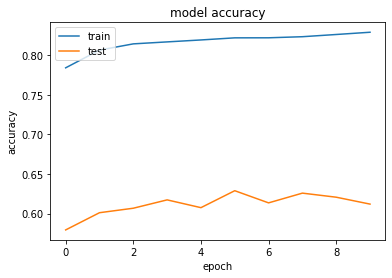

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [23]:
acc_tr, loss_tr = model.evaluate_generator(train_data)
print(acc_tr)
print(loss_tr)

1.2296480010578585
0.6836594


In [24]:
acc_vr, loss_vr = model.evaluate_generator(validation_data)
print(acc_vr)
print(loss_vr)

2.003237454486191
0.6123073


In [25]:
acc_test, loss_test = model.evaluate_generator(test_data)
print(acc_test)
print(loss_test)

1.6732353359995136
0.5630294


In [26]:
history.history

{'loss': [0.44989987531216474,
  0.4105325863920206,
  0.39987231404560186,
  0.3942663636289366,
  0.39097809048361015,
  0.38601469604829536,
  0.38809175912771127,
  0.38556292730181757,
  0.3856511831407663,
  0.37401714994872054],
 'accuracy': [0.7841284,
  0.8065256,
  0.81439793,
  0.81688654,
  0.81934255,
  0.82201004,
  0.8220751,
  0.8234414,
  0.826239,
  0.8290854],
 'val_loss': [2.4888842144204926,
  2.044025171272612,
  2.2479525849766406,
  1.9556578121788335,
  2.051317493070383,
  1.7132613045473895,
  2.0519826520156736,
  1.8245393834426067,
  1.7401402722539692,
  1.9869601120590232],
 'val_accuracy': [0.5792969,
  0.6010417,
  0.6067057,
  0.6172526,
  0.6074219,
  0.62884116,
  0.6134766,
  0.62578124,
  0.620638,
  0.61191404],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.000100000005]}

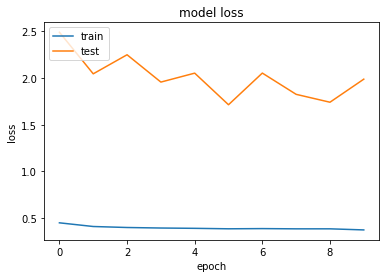

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [29]:
import pandas as pd

<AxesSubplot:>

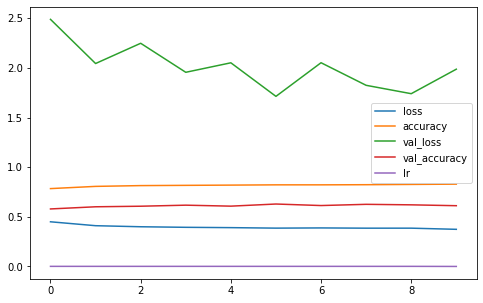

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))